# softmax简洁实现

In [1]:
import torch as tor
from torch import nn
from d2l import torch as d2l_tor

batch_size = 256
train_iter, test_iter = d2l_tor.load_data_fashion_mnist(batch_size)

首先这个就是基础的库的导入

In [2]:
a = tor.ones(2,3,4)
a

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [3]:
a.flatten(),a.shape,a.flatten().shape

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1.]),
 torch.Size([2, 3, 4]),
 torch.Size([24]))

In [4]:
# pytorch不会自动的隐式的调整输入的形状
# 因此我们需要定义展平层(flatten)在线性层之前进行输入形状的调整(第0维度保留，其余均展成一个向量)
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
# 对于Flatten()我们给予的例子是假如是一个100x28x28的数据(就是100张28x28的图片【单通道图片】)
def init_weight(m):
    if type(m) == nn.Linear: # 这个type是看的是这个是什么样的layer
        nn.init.normal_(m.weight, std=0.01) # 初始化——均值为0方差为0.01

net.apply(init_weight)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

这一步就是直接配置这个模型所需要的所有组件

In [5]:
loss = nn.CrossEntropyLoss() # 设置loss计算方法为交叉熵

注意，这里的交叉熵传入的值是未初始化的值，直接计算其softmax和对数

In [6]:
trainer = tor.optim.SGD(net.parameters(), lr = 0.1) # 这里是设置优化方法为小批量随机梯度下降，lr是learn_rate学习率是0.1

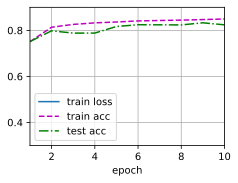

In [7]:
num_epochs = 10
d2l_tor.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

注意！在新版的d2l中ch3这个系列好像被删除了，不过其效果就是和我们的从0到1实现是一样的，截图为证

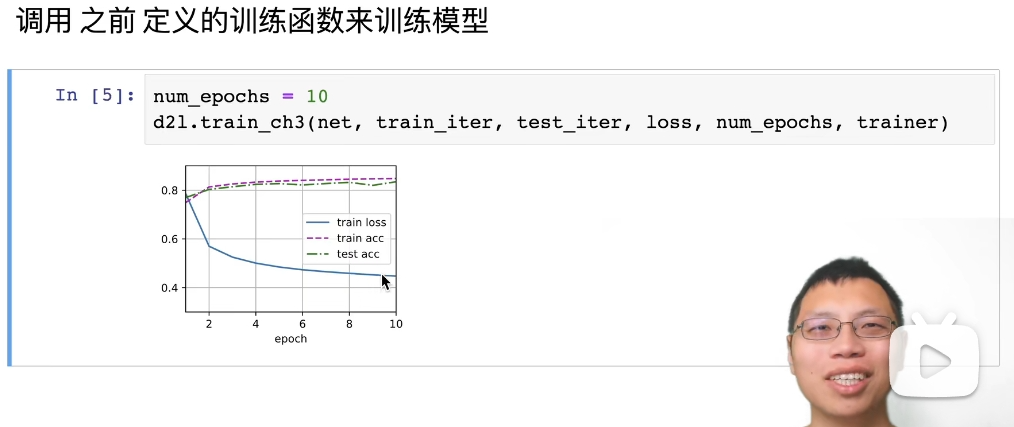